In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

trigram = "trigram.csv"
trigram1 = "trigram1.csv"
trigram2 = "trigram2.csv"

In [3]:
df =  pd.read_csv(trigram).rename(columns={"0": "Stop"})
df1 =  pd.read_csv(trigram1).rename(columns={"0": "Stop"})
df2 =  pd.read_csv(trigram2).rename(columns={"0": "Stop"})
userdf = pd.read_csv('DayStopTrigram.csv')

In [4]:
Stops = df['Stop'].value_counts()
Stops1 = df1['Stop'].value_counts()
Stops2 = df2['Stop'].value_counts()

In [5]:
bigram = Stops[0:13].to_dict()
bigram1 = Stops1[0:13].to_dict()
bigram2 = Stops2[0:22].to_dict()

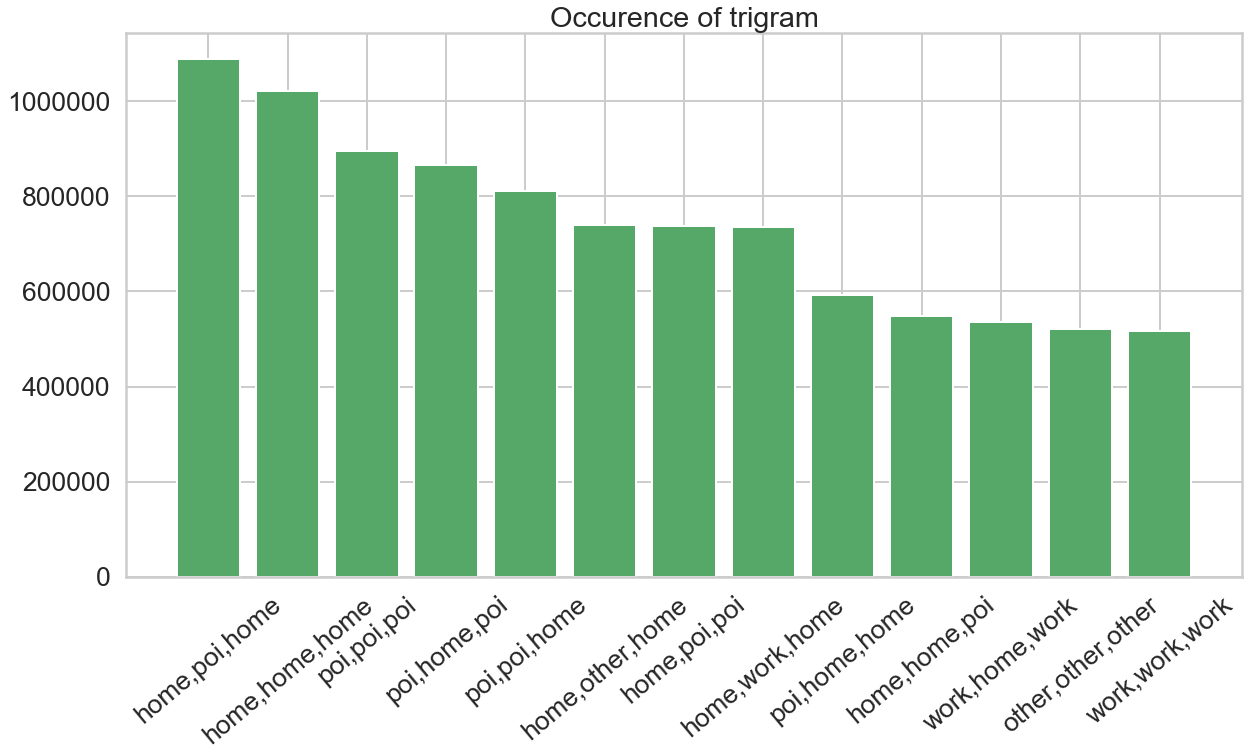

In [6]:
plt.bar(list(bigram), bigram.values(), color='g')
plt.title('Occurence of trigram')
plt.xticks(rotation=40)
plt.show()

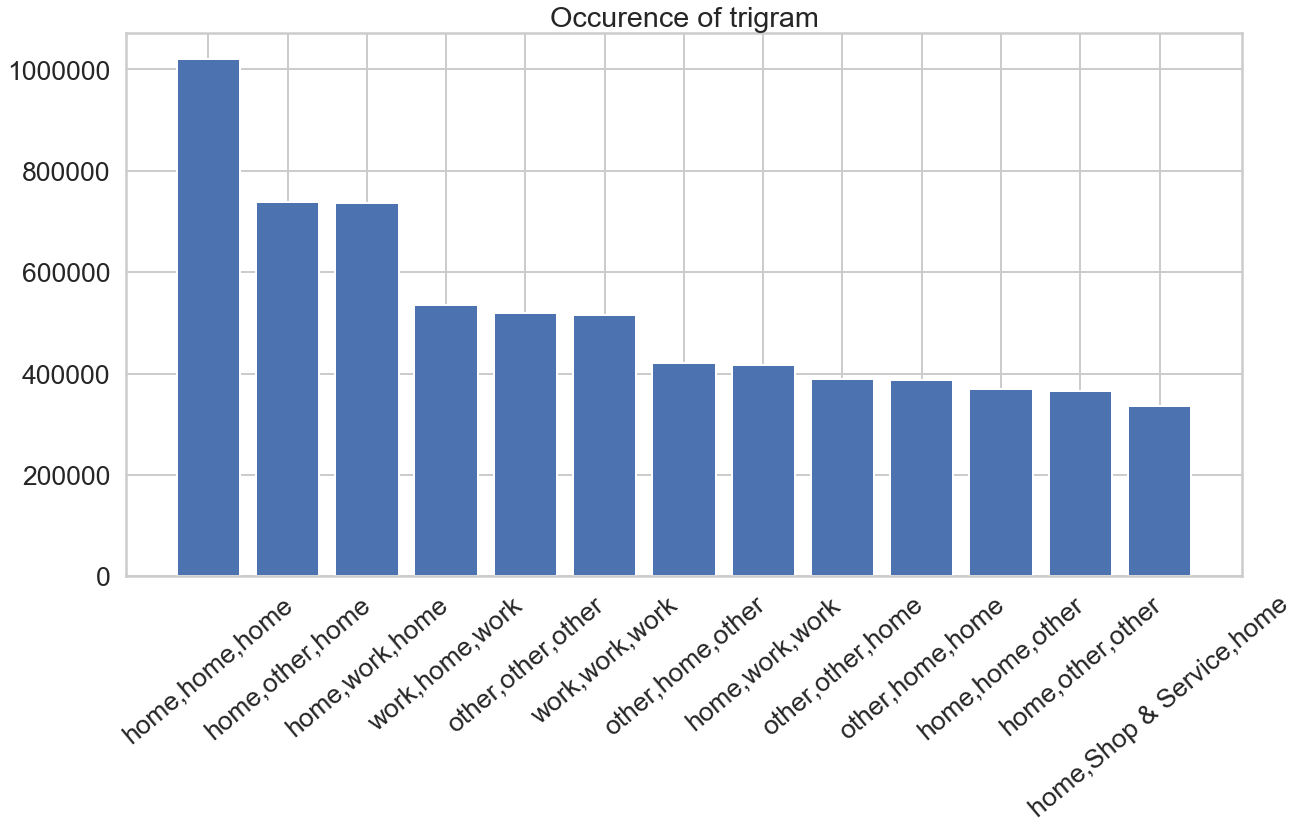

In [7]:
plt.bar(list(bigram1), bigram1.values(), color='b')
plt.title('Occurence of trigram')
plt.xticks(rotation=40)
plt.show()

In [8]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

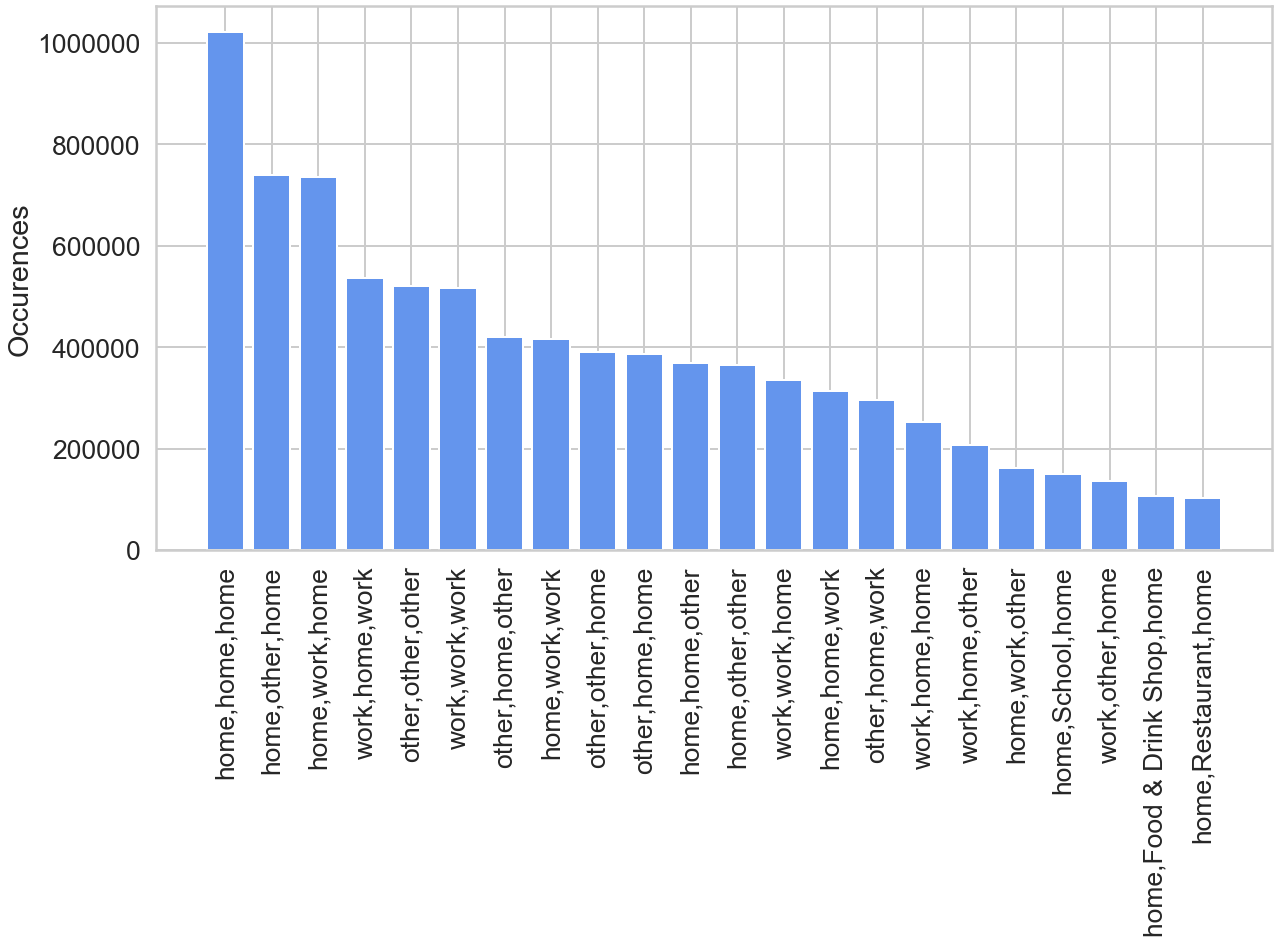

In [9]:
plt.bar(list(bigram2), bigram2.values(), color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylabel('Occurences')
plt.savefig('trigram.png', bbox_inches='tight') #Save plot
plt.show()

In [10]:
dfStop = pd.DataFrame.from_dict(bigram, orient='index')
df1Stop = pd.DataFrame.from_dict(bigram1, orient='index')
df2Stop = pd.DataFrame.from_dict(bigram2, orient='index')

In [11]:
dfStop = dfStop.rename(columns = {0: 'Occurrence'})
df1Stop = df1Stop.rename(columns = {0: 'Occurrence'})
df2Stop = df2Stop.rename(columns = {0: 'Occurrence'})

In [12]:
#Computes probability of stops
dfStop['Probability'] = dfStop.Occurrence/dfStop.sum()['Occurrence']
df1Stop['Probability'] = df1Stop.Occurrence/df1Stop.sum()['Occurrence']
df2Stop['Probability'] = df2Stop.Occurrence/df2Stop.sum()['Occurrence']

In [13]:
dfStop = dfStop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)
df1Stop = df1Stop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)
df2Stop = df2Stop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)

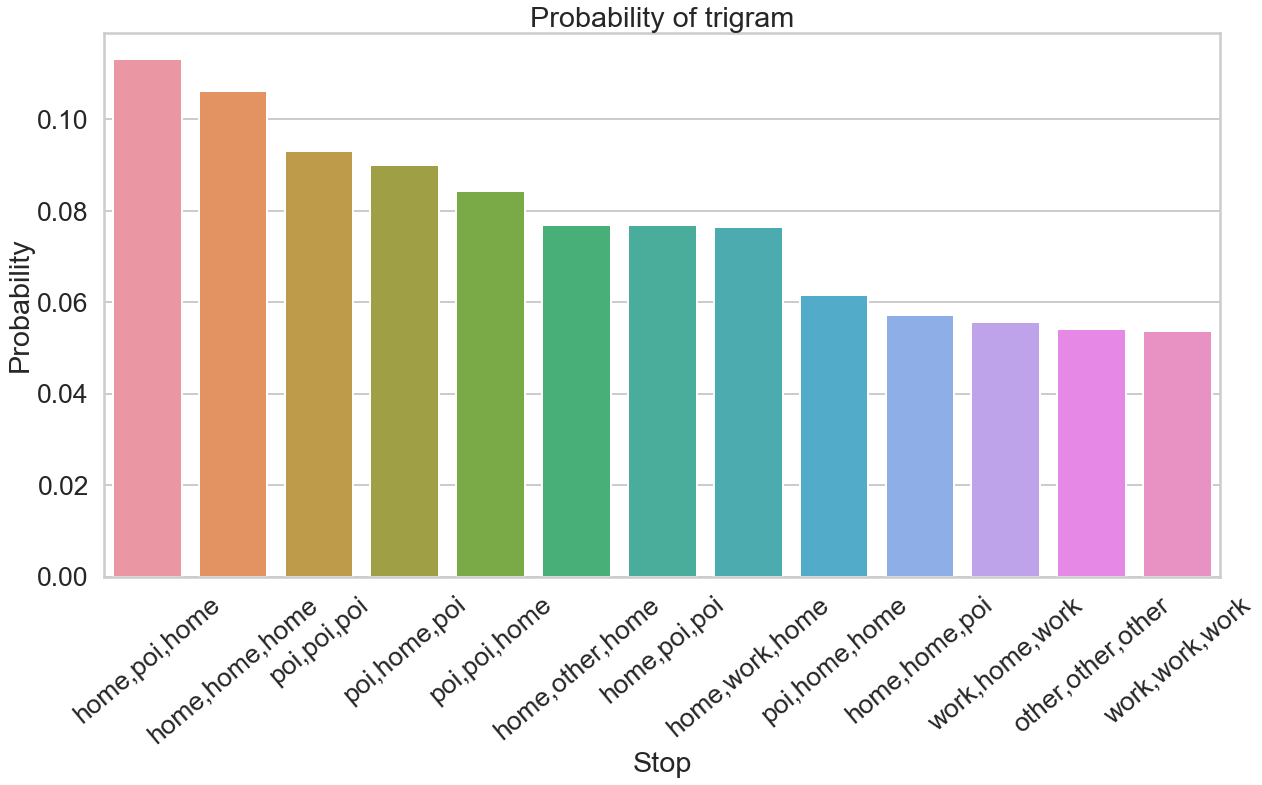

In [14]:
sns.barplot(x = 'Stop', y = 'Probability', data=dfStop).set(title='Probability of trigram')
plt.xticks(rotation=40)
plt.show()

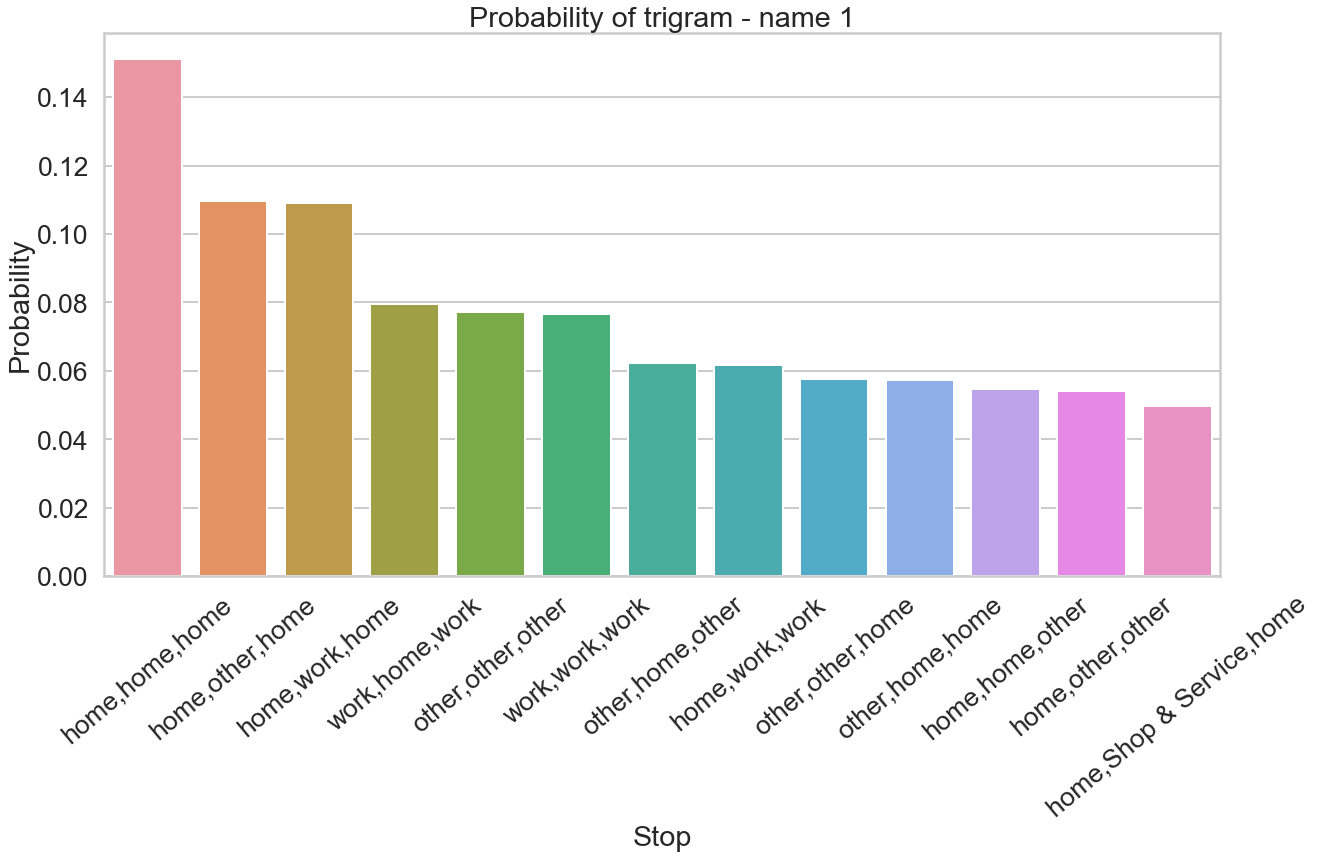

In [15]:
sns.barplot(x = 'Stop', y = 'Probability', data=df1Stop).set(title='Probability of trigram - name 1')
plt.xticks(rotation=40)
plt.show()

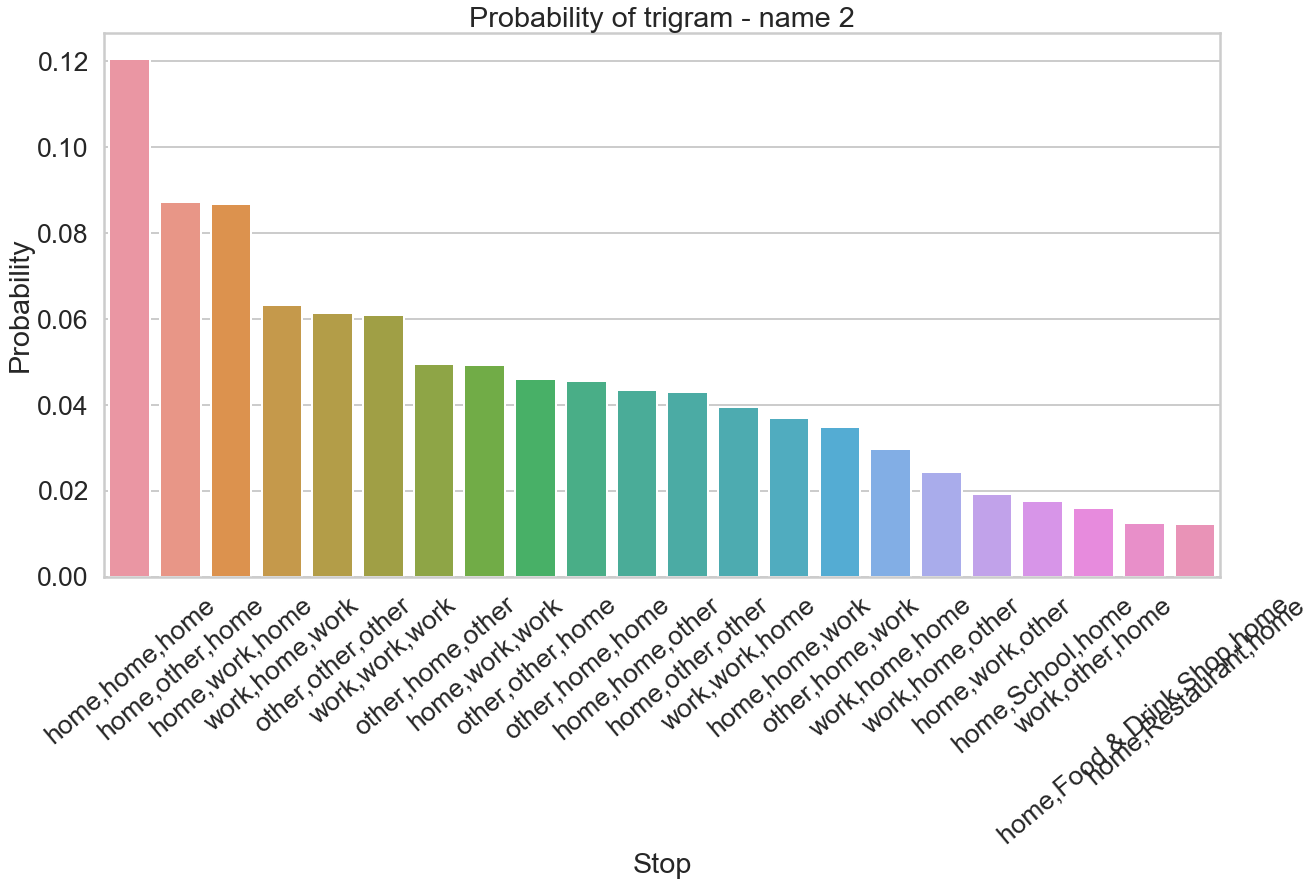

In [16]:
sns.barplot(x = 'Stop', y = 'Probability', data=df2Stop).set(title='Probability of trigram - name 2')
plt.xticks(rotation=40)
plt.show()

In [17]:
#Occurence of trigram(for each user and each trigram)
trigramOccurence = userdf.groupby(['userId', 'Stop']).size().reset_index().rename(columns={0: "Occurence"})

In [18]:
#count number of trigrams for each user
trigramCount = userdf.groupby('userId').count()['Stop'].reset_index().rename(columns={'Stop': 'StopCount'})

In [19]:
trigramOccurence = pd.merge(trigramOccurence, trigramCount, on='userId')

In [20]:
#Occurence/trigram
trigramOccurence['Occurence/trigram'] = trigramOccurence['Occurence']/trigramOccurence['StopCount']

In [21]:
#(Below is the 10 most frequent, which is only regarding home and other. Not really interesting.)
trigramOccurence.groupby(['Stop', 'Occurence/trigram']).size().reset_index().rename(columns={0: 'Count'}).nlargest(10, 'Count')

,Stop,Occurence/trigram,Count
2601182,"home,other,home",0.031250,243
2601413,"home,other,home",0.034483,227
2602153,"home,other,home",0.045455,224
2602972,"home,other,home",0.058824,223
2600979,"home,other,home",0.028571,222
2608257,"home,other,other",0.013699,222
2602025,"home,other,home",0.043478,218
2601042,"home,other,home",0.029412,217
2602293,"home,other,home",0.047619,212
2601908,"home,other,home",0.041667,209
